In [85]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# attr_names = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit", "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "class"]
# 
# df = pd.read_csv('data/spambase.data', names=attr_names)

attr_names = ["class", "age", "sex", "histologic-type", "degree-of-diffe", "bone", "bone-marrow", "lung", "pleura", "peritoneum", "liver", "brain", "skin", "neck", "supraclavicular", "axillar", "mediastinum", "abdominal"]

df = pd.read_csv('../pract_5-6/data/primary-tumor.data', names=attr_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   class            339 non-null    int64
 1   age              339 non-null    int64
 2   sex              339 non-null    int64
 3   histologic-type  339 non-null    int64
 4   degree-of-diffe  339 non-null    int64
 5   bone             339 non-null    int64
 6   bone-marrow      339 non-null    int64
 7   lung             339 non-null    int64
 8   pleura           339 non-null    int64
 9   peritoneum       339 non-null    int64
 10  liver            339 non-null    int64
 11  brain            339 non-null    int64
 12  skin             339 non-null    int64
 13  neck             339 non-null    int64
 14  supraclavicular  339 non-null    int64
 15  axillar          339 non-null    int64
 16  mediastinum      339 non-null    int64
 17  abdominal        339 non-null    int64
dtypes: int64(1

In [3]:
df.head()

,class,age,sex,histologic-type,degree-of-diffe,bone,bone-marrow,lung,pleura,peritoneum,liver,brain,skin,neck,supraclavicular,axillar,mediastinum,abdominal
0,1,1,1,5,3,2,2,1,2,2,2,2,2,2,2,2,2,2
1,1,1,1,5,3,2,2,2,2,2,1,2,2,2,1,2,1,2
2,1,1,2,2,3,1,2,2,2,2,2,2,2,2,2,2,1,2
3,1,1,2,5,3,1,2,1,1,2,2,2,2,2,2,2,1,2
4,1,1,2,5,3,1,2,1,1,2,2,2,2,2,2,2,1,2


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['degree-of-diffe'], axis=1)
y = df["degree-of-diffe"]
print(y)


0      3
1      3
2      3
3      3
4      3
      ..
334    5
335    5
336    5
337    2
338    2
Name: degree-of-diffe, Length: 339, dtype: int64


In [129]:
# knn visualisation
from sklearn.svm import SVC
from sklearn.manifold import TSNE
import umap

def svc_exec(X, y, balancer_name):
    param_grid = {'kernel': ['linear', 'rbf', "sigmoid", "poly"], 'C': [0.1, 1, 10]}

    # Создание объекта GridSearchCV
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    
    # Обучение GridSearchCV на обучающей выборке
    grid_search.fit(X, y)
    
    # Вывод наилучших параметров и оценки качества
    svm = grid_search.best_estimator_
    print('Best parameters:', grid_search.best_params_)
    print('Train accuracy:', grid_search.best_score_)
    print('Test accuracy:', grid_search.score(X, y))
    
    y_train_pred = svm.predict(X)
    # y_test_pred = svm.predict(X)

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    ump = umap.UMAP(n_components=2)
    X_umap = ump.fit_transform(X)
    
    plt.figure(figsize=(22, 5))
    plt.subplot(1, 4, 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:], cmap='viridis', marker='o')
    plt.colorbar()
    plt.title(f't-SNE {balancer_name} original')

    plt.subplot(1, 4, 2)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_pred[:], cmap='viridis', marker='o',)
    plt.title(f't-SNE {balancer_name} pred')
    plt.colorbar()

    plt.subplot(1, 4, 3)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y[:], cmap='viridis', marker='o')
    plt.colorbar()
    plt.title(f'UMAP {balancer_name} original')

    plt.subplot(1, 4, 4)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train_pred[:], cmap='viridis', marker='o',)
    plt.title(f'UMAP {balancer_name} pred')
    plt.colorbar()
    plt.subplots_adjust(wspace=0.1)
    plt.show()

In [127]:
# knn visualisation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
import umap

def knn_exec(X, y, balancer_name):
    param_grid = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}

    # Создание объекта GridSearchCV
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    
    # Обучение GridSearchCV на обучающей выборке
    grid_search.fit(X, y)
    
    # Вывод наилучших параметров и оценки качества
    knn = grid_search.best_estimator_
    print('Best parameters:', grid_search.best_params_)
    print('Train accuracy:', grid_search.best_score_)
    print('Test accuracy:', grid_search.score(X, y))

    y_train_pred = knn.predict(X)
    # y_test_pred = knn.predict(X)

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    ump = umap.UMAP(n_components=2)
    X_umap = ump.fit_transform(X)

    plt.figure(figsize=(22, 5))
    plt.subplot(1, 4, 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:], cmap='viridis', marker='o')
    plt.colorbar()
    plt.title(f't-SNE {balancer_name} original')

    plt.subplot(1, 4, 2)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_pred[:], cmap='viridis', marker='o',)
    plt.title(f't-SNE {balancer_name} pred')
    plt.colorbar()

    plt.subplot(1, 4, 3)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y[:], cmap='viridis', marker='o')
    plt.colorbar()
    plt.title(f'UMAP {balancer_name} original')

    plt.subplot(1, 4, 4)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train_pred[:], cmap='viridis', marker='o',)
    plt.title(f'UMAP {balancer_name} pred')
    plt.colorbar()
    plt.subplots_adjust(wspace=0.1)
    plt.show()

In [125]:
from sklearn.ensemble import RandomForestClassifier

def rfc_exec(X, y, balancer_name):
    param_grid = {'n_estimators': [100, 200],
                  'max_depth': [None, 10],
                  'min_samples_split': [2, 5],
                  'max_features': ['sqrt', 'log2']}

# Создание объекта GridSearchCV
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    
    # Обучение GridSearchCV на обучающей выборке
    grid_search.fit(X, y)

    rfc = grid_search.best_estimator_
    print('Best parameters:', grid_search.best_params_)
    print('Train accuracy:', grid_search.best_score_)
    print('Test accuracy:', grid_search.score(X, y))

    y_train_pred = rfc.predict(X)
    # y_test_pred = rfc.predict(X)

    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X)

    ump = umap.UMAP(n_components=2)
    X_umap = ump.fit_transform(X)

    plt.figure(figsize=(22, 5))
    plt.subplot(1, 4, 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y[:], cmap='viridis', marker='o')
    plt.colorbar()
    plt.title(f't-SNE {balancer_name} original')

    plt.subplot(1, 4, 2)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_pred[:], cmap='viridis', marker='o',)
    plt.title(f't-SNE {balancer_name} pred')
    plt.colorbar()

    plt.subplot(1, 4, 3)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y[:], cmap='viridis', marker='o')
    plt.colorbar()
    plt.title(f'UMAP {balancer_name} original')

    plt.subplot(1, 4, 4)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_train_pred[:], cmap='viridis', marker='o',)
    plt.title(f'UMAP {balancer_name} pred')
    plt.colorbar()
    plt.subplots_adjust(wspace=0.1)
    plt.show()

In [90]:
#balance for knn
smote = SMOTE(sampling_strategy="auto", k_neighbors=3, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

smote = BorderlineSMOTE(sampling_strategy="auto", k_neighbors=3, random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

smote = BorderlineSMOTE(sampling_strategy="auto", k_neighbors=3, random_state=42, kind="borderline-2")
X_smote, y_smote = smote.fit_resample(X, y)



Best parameters: {'C': 0.1, 'kernel': 'linear'}
Train accuracy: 0.45958562811434567
Test accuracy: 0.5550161812297735


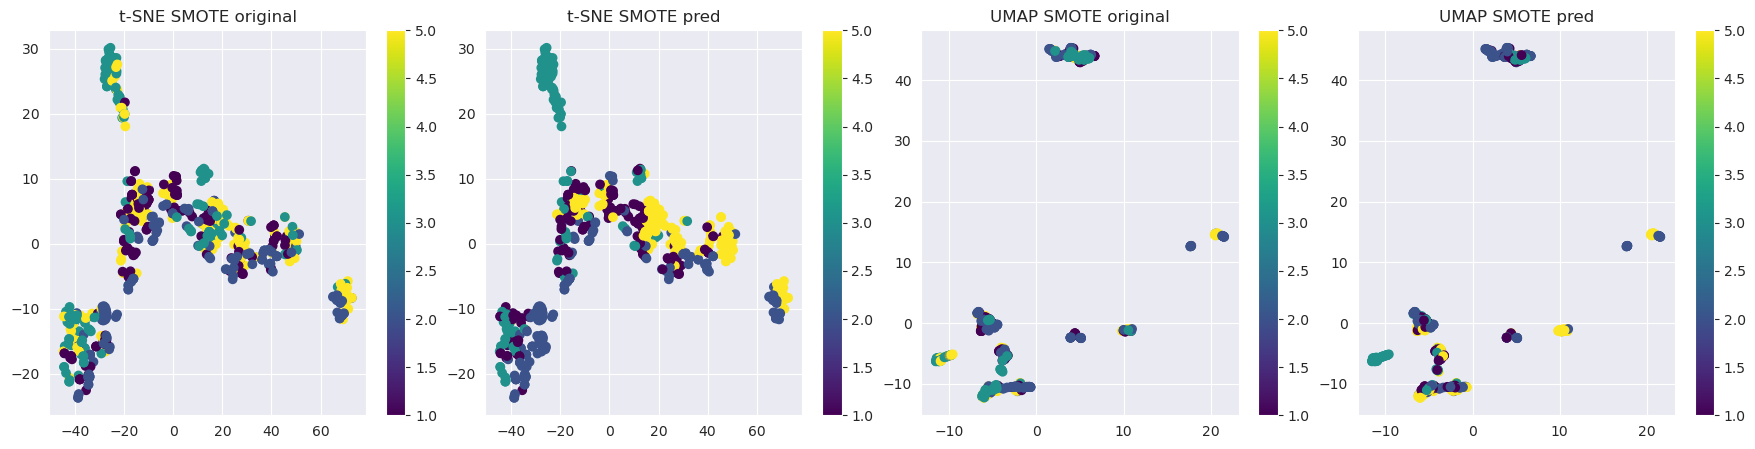

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Train accuracy: 0.45958562811434567
Test accuracy: 0.5550161812297735


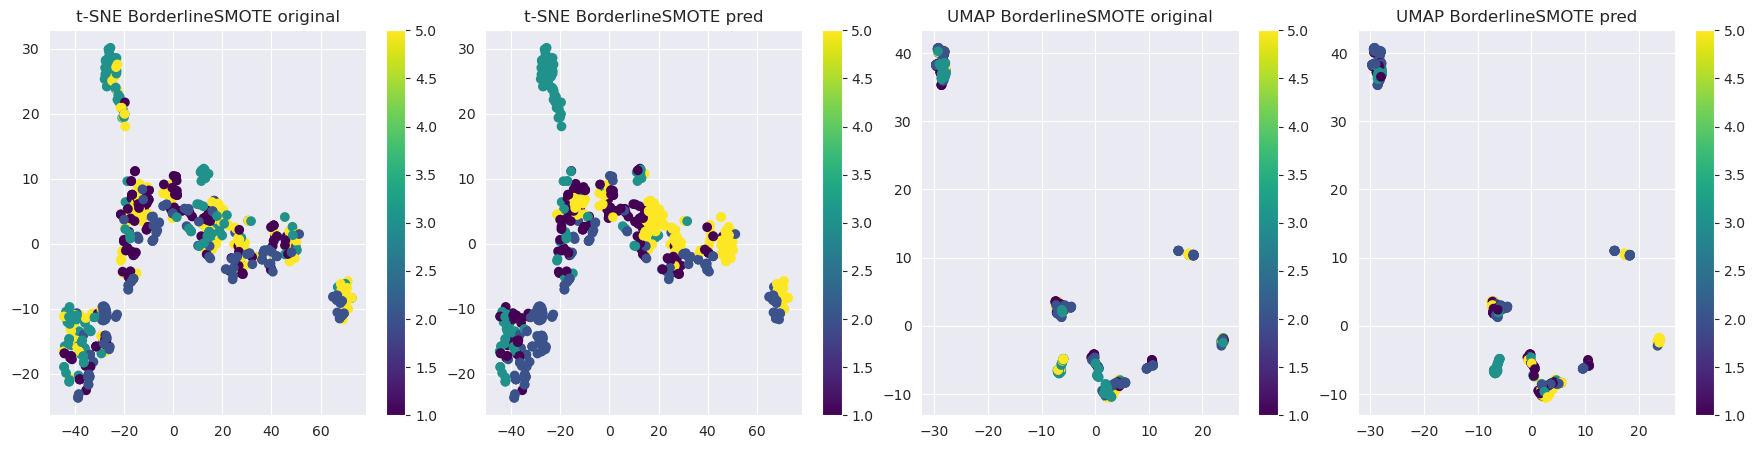

Best parameters: {'C': 0.1, 'kernel': 'linear'}
Train accuracy: 0.45958562811434567
Test accuracy: 0.5550161812297735


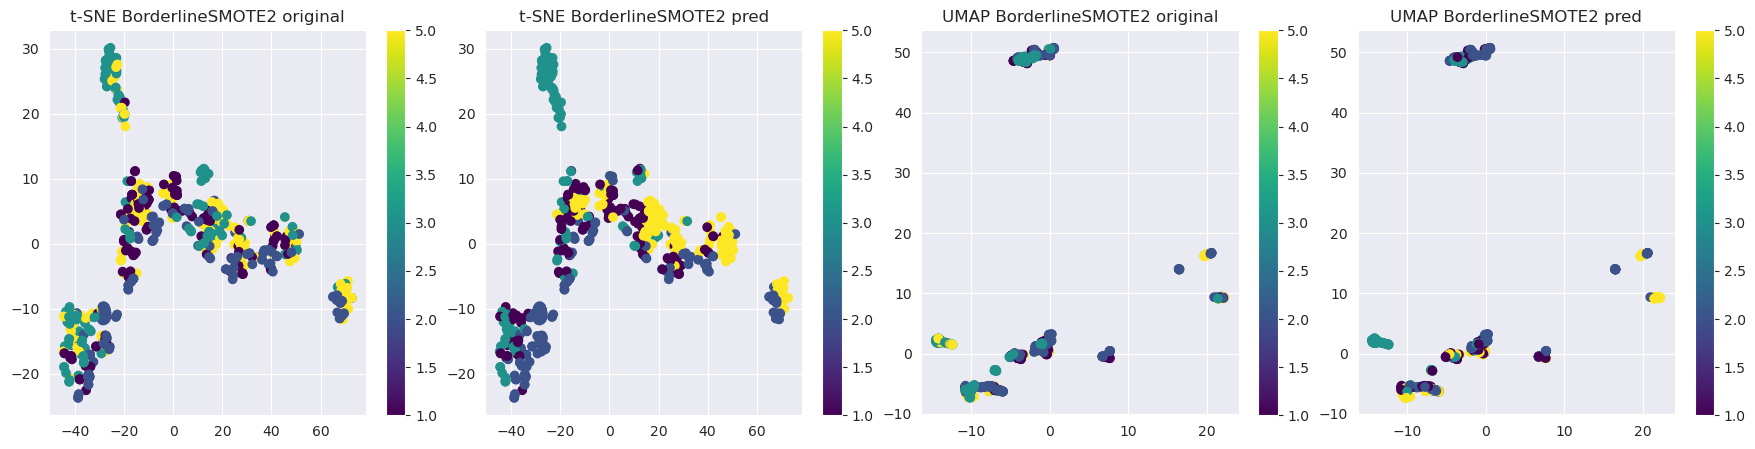

In [130]:
svc_exec(X_smote, y_smote, "SMOTE")
svc_exec(X_smote, y_smote, "BorderlineSMOTE")
svc_exec(X_smote, y_smote, "BorderlineSMOTE2")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Train accuracy: 0.4950957251507999
Test accuracy: 0.7718446601941747


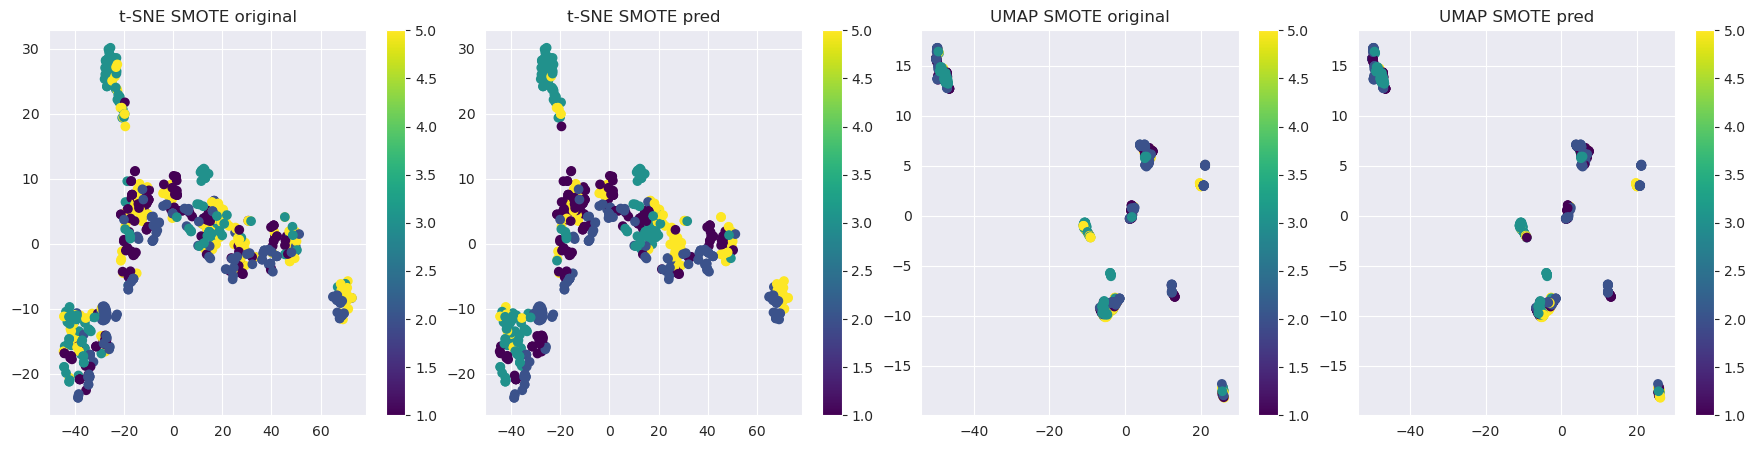

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Train accuracy: 0.4950957251507999
Test accuracy: 0.7718446601941747


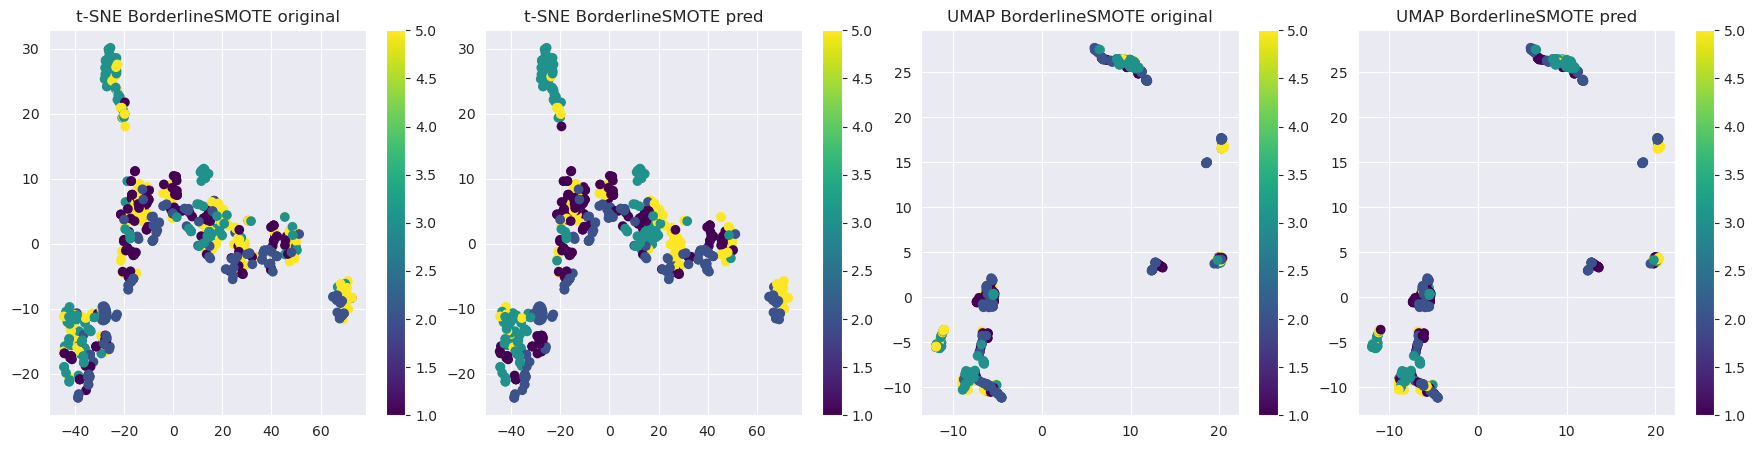

Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}
Train accuracy: 0.4950957251507999
Test accuracy: 0.7718446601941747


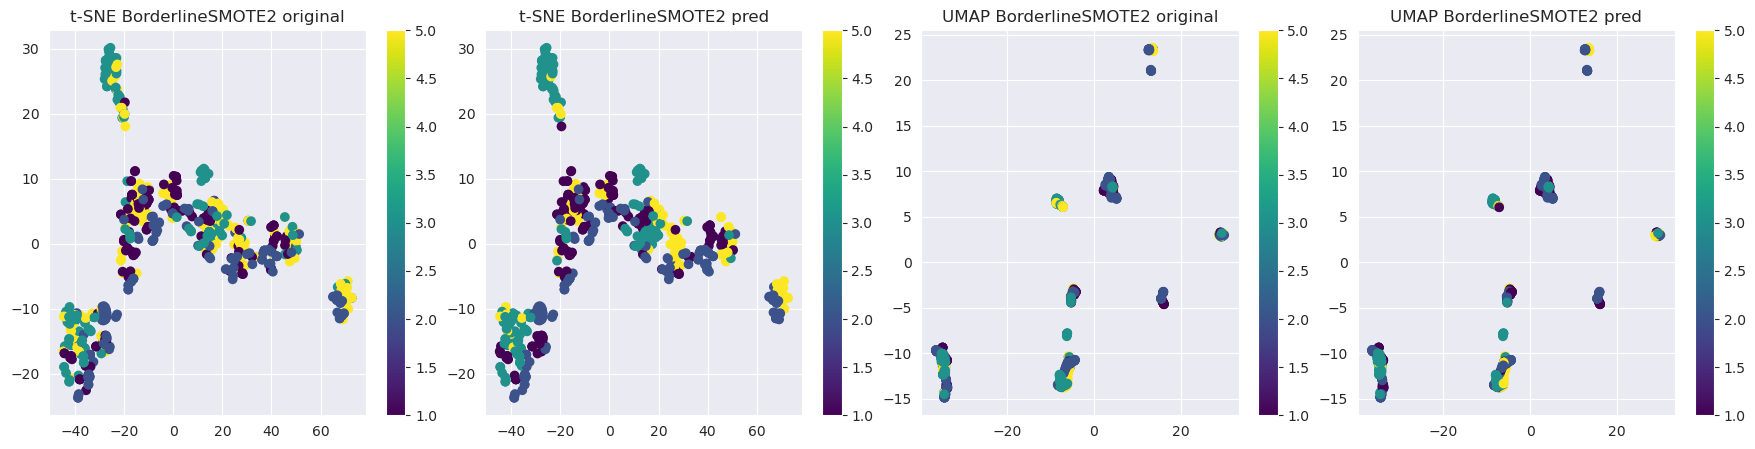

In [128]:
knn_exec(X_smote, y_smote, "SMOTE")
knn_exec(X_smote, y_smote, "BorderlineSMOTE")
knn_exec(X_smote, y_smote, "BorderlineSMOTE2")

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Train accuracy: 0.5388408077629163
Test accuracy: 0.9498381877022654


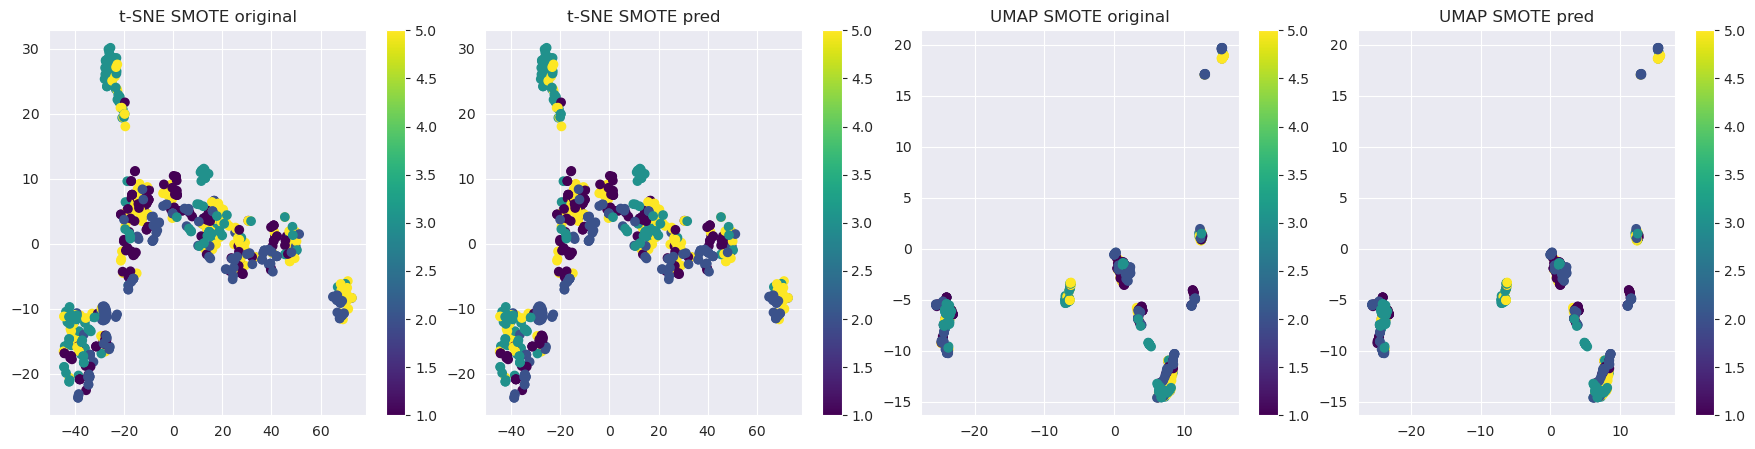

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Train accuracy: 0.5453579858379229
Test accuracy: 0.919093851132686


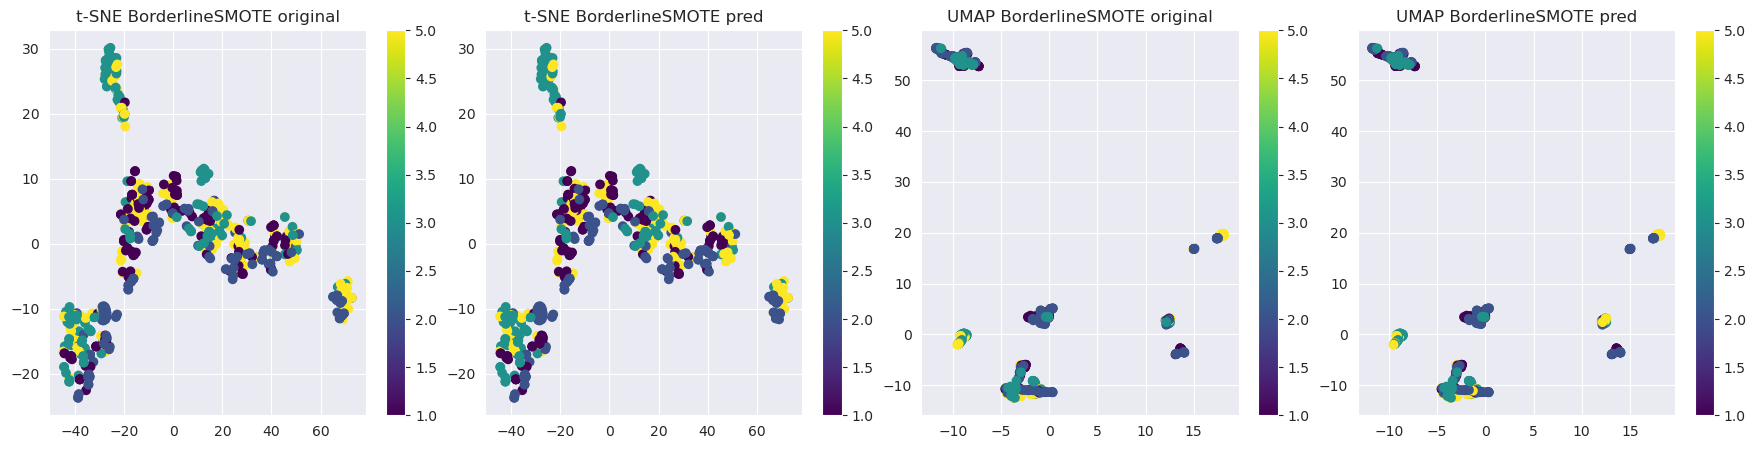

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Train accuracy: 0.5421059533175977
Test accuracy: 0.9498381877022654


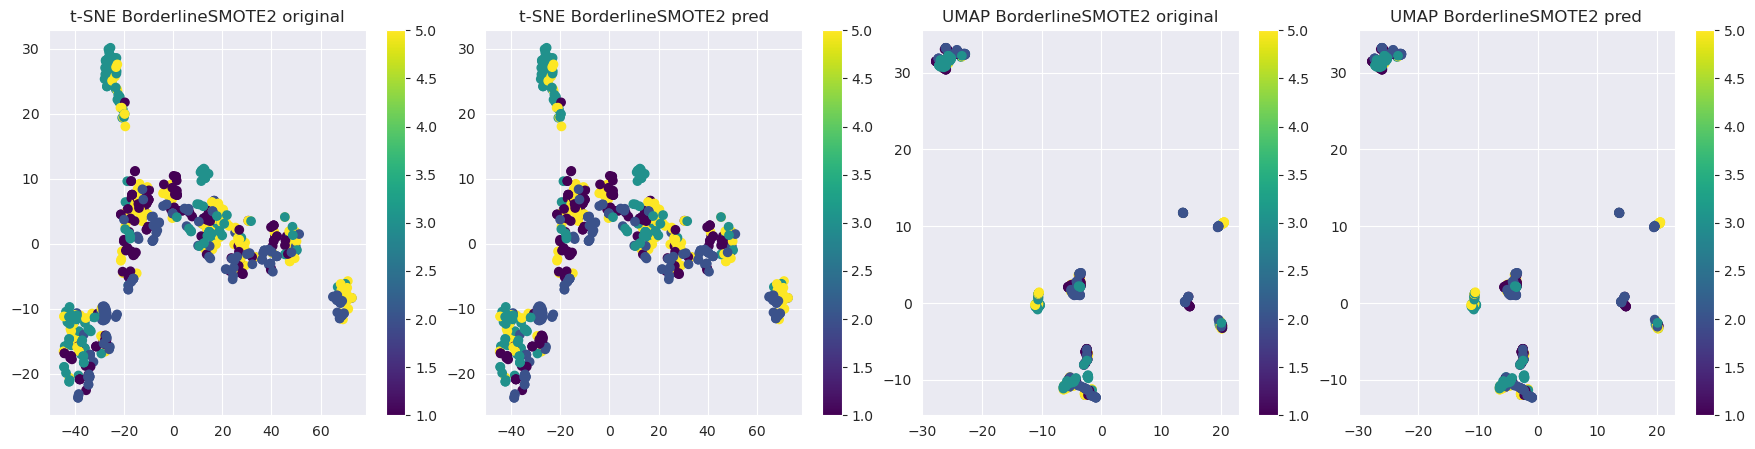

In [126]:
rfc_exec(X_smote, y_smote, "SMOTE")
rfc_exec(X_smote, y_smote, "BorderlineSMOTE")
rfc_exec(X_smote, y_smote, "BorderlineSMOTE2")